<a href="https://colab.research.google.com/github/muhammadtarek98/deep-learning-exercies/blob/master/cat%20%26%20dog%20classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import dataset & libraries & some properties of the dataset 

In [9]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os 
import numpy as np
import matplotlib.pyplot as plt


url='https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_dir=tf.keras.utils.get_file('cats_and_dogs_filterted.zip', origin=url, extract=True)
base_dir = os.path.join(os.path.dirname(zip_dir), 'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory with our validation dog pictures
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))
num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))
total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val
print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)
print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)


total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


model parameters

In [0]:
BATCH_SIZE = 100
epoches=100
IMG_SHAPE  = 150 # Our training data consists of images with width of 150 pixels and height of 150 pixels

In [0]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

Data augmentation :

1-flip image

Found 2000 images belonging to 2 classes.


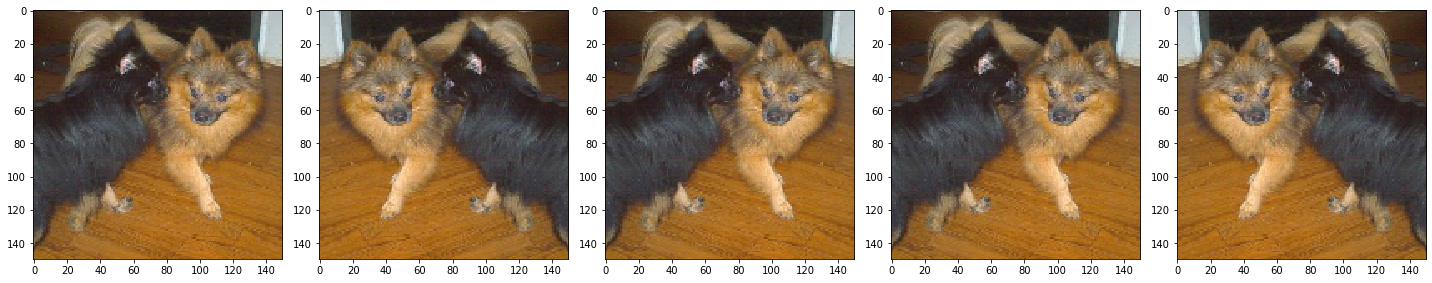

In [34]:
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)
train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_SHAPE,IMG_SHAPE))
augmented_image=[train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_image)

2-Rotate image:

Found 2000 images belonging to 2 classes.


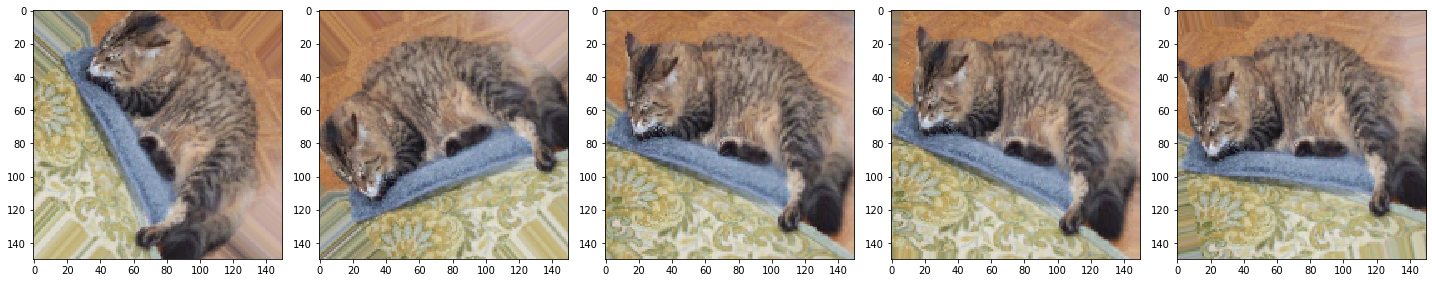

In [36]:
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_SHAPE, IMG_SHAPE))
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

3-image zooming 

Found 2000 images belonging to 2 classes.


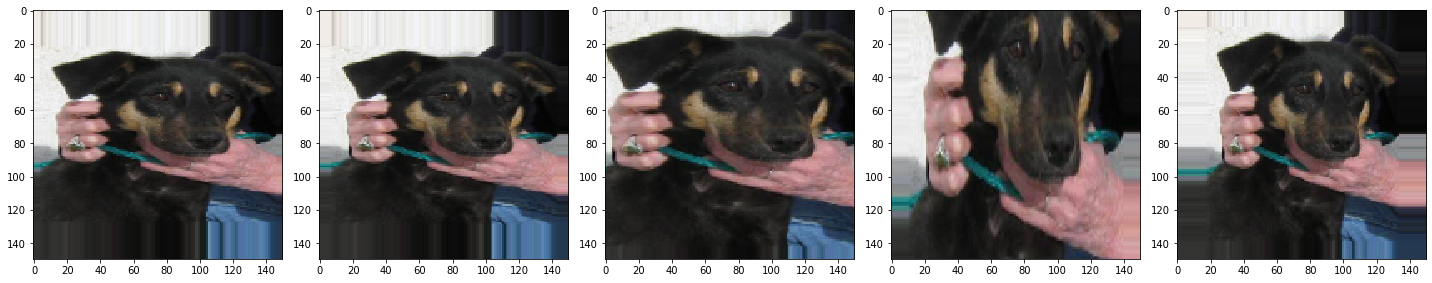

In [37]:
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5)

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_SHAPE, IMG_SHAPE))
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

apply filp,rotate,zoom

Found 2000 images belonging to 2 classes.


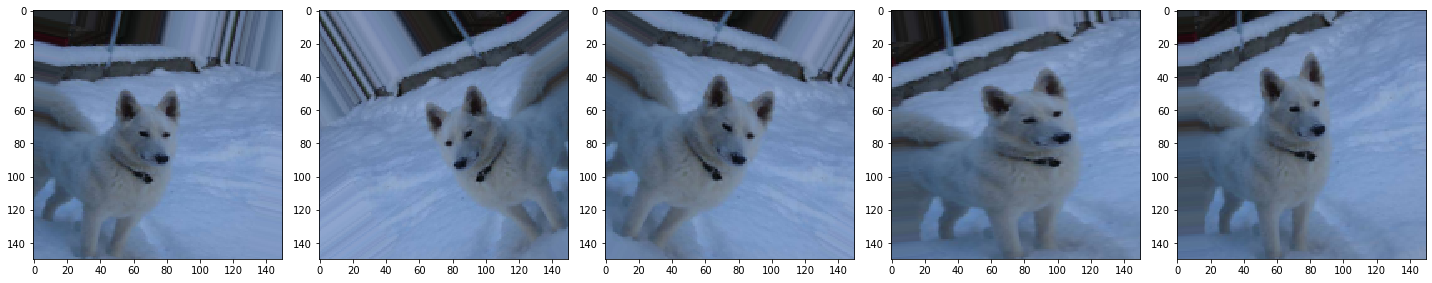

In [38]:
image_gen_train = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_data_gen = image_gen_train.flow_from_directory(batch_size=BATCH_SIZE,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_SHAPE,IMG_SHAPE),
                                                     class_mode='binary')
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

Creating Validation Data generator

In [58]:
image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size=BATCH_SIZE,
                                                 directory=validation_dir,
                                                 target_size=(IMG_SHAPE, IMG_SHAPE),
                                                 class_mode='binary')

Found 1000 images belonging to 2 classes.


create the model

In [0]:
model_creation=[
                tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
                tf.keras.layers.MaxPooling2D(2,2),

                tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                tf.keras.layers.MaxPooling2D(2,2),

                tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
                tf.keras.layers.MaxPooling2D(2,2),

                tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
                tf.keras.layers.MaxPooling2D(2,2),

                tf.keras.layers.Dropout(0.5),

                tf.keras.layers.Flatten(),
                tf.keras.layers.Dense(512,activation='relu'),
                tf.keras.layers.Dense(2,activation='softmax')

]
model=tf.keras.models.Sequential(model_creation)


compile the model


In [62]:
model.compile(
    optimizer='adam',metrics=['accuracy'],
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
)
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 15, 15, 128)      

train the model


In [67]:
history=model.fit_generator(
    train_data_gen,
    epochs=epoches,
    steps_per_epoch=int(np.ceil(total_train/float(BATCH_SIZE))),
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(total_val / float(BATCH_SIZE)))
)

Epoch 1/100
20/20 [==============================] - 18s 906ms/step - loss: 0.5193 - acc: 0.7805 - val_loss: 0.5091 - val_acc: 0.7940
Epoch 2/100
20/20 [==============================] - 16s 794ms/step - loss: 0.5259 - acc: 0.7720 - val_loss: 0.5188 - val_acc: 0.7810
Epoch 3/100
20/20 [==============================] - 16s 793ms/step - loss: 0.5164 - acc: 0.7900 - val_loss: 0.5212 - val_acc: 0.7800
Epoch 4/100
20/20 [==============================] - 16s 793ms/step - loss: 0.5345 - acc: 0.7640 - val_loss: 0.5133 - val_acc: 0.7840
Epoch 5/100
20/20 [==============================] - 16s 792ms/step - loss: 0.5282 - acc: 0.7770 - val_loss: 0.5160 - val_acc: 0.7800
Epoch 6/100
20/20 [==============================] - 16s 787ms/step - loss: 0.5091 - acc: 0.7990 - val_loss: 0.5107 - val_acc: 0.7980
Epoch 7/100
20/20 [==============================] - 16s 789ms/step - loss: 0.5052 - acc: 0.8005 - val_loss: 0.5858 - val_acc: 0.7130
Epoch 8/100
20/20 [==============================] - 16s 783ms

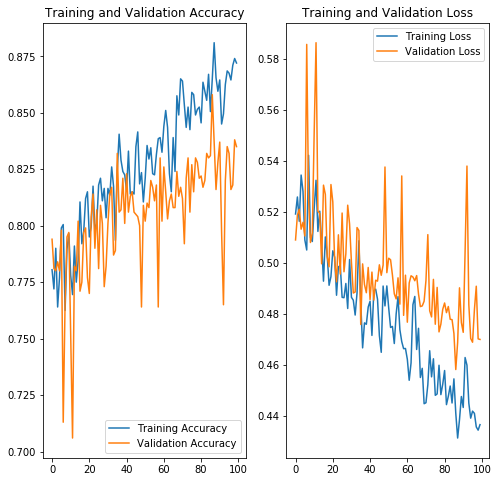

In [76]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epoches)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()